# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [123]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [124]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"


Wholesale customers dataset has 440 samples with 6 features each.


In [125]:
# print data head and tail
display(data.head()); display(data.tail()) 

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
435  29703  12051    16027   13135               182          2204
436  39228   1431      764    4510                93          2346
437  14531  15488    30243     437             14841          1867
438  10290   1981     2232    1038               168          2125
439   2787   1698     2510      65               477            52

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [126]:
# Display a description of the dataset
display(data.describe().round(2))

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
count     440.00    440.00    440.00    440.00            440.00        440.00
mean    12000.30   5796.27   7951.28   3071.93           2881.49       1524.87
std     12647.33   7380.38   9503.16   4854.67           4767.85       2820.11
min         3.00     55.00      3.00     25.00              3.00          3.00
25%      3127.75   1533.00   2153.00    742.25            256.75        408.25
50%      8504.00   3627.00   4755.50   1526.00            816.50        965.50
75%     16933.75   7190.25  10655.75   3554.25           3922.00       1820.25
max    112151.00  73498.00  92780.00  60869.00          40827.00      47943.00

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [127]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import random 
# indices = [random.randint(0, data.shape[0] - 1) for _ in range(3)]
indices = [100, 250, 385]
print "Select the sample: ", indices

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Select the sample:  [100, 250, 385]
Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594  7779    12144    3252              8035          3029
1   3191  1993     1799    1730               234           710
2  11635   922     1614    2583               192          1068

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

> What kind of establishment (customer) could each of the three samples you've chosen represent?
  - The `indices = 100` data point most likely represents a **large scale** restaurant. The values of all categories, except `fresh`, are over the **75% (upper 25%)** of the data, which may mean the data point represents a high-end restaurant.  
>
  - The `indices = 250` data point most likely represents a **small-size** restaurant. Annual spending amounts for 5 categories are in the **lower 25%** of the data, and the delicatessen are near the lower 25%. 
> 
  - The `indices = 385` data point has 3 categories (`milk, grocery, frozen, detergents_paper`) in the lower 25%. On the other hand, spending on `fresh` is in the upper 25% and annual spending on `delicatessen` are near the median. The annual spending pattern indicates that this customer most likely represents a **median- or smaller-size** grocery store.

> The percentile ranks and the samples compared to median and to mean can provide descriptions above. 

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
100  0.625  0.786    0.802   0.730             0.914         0.905
250  0.257  0.327    0.184   0.534             0.223         0.399
385  0.627  0.116    0.143   0.664             0.177         0.548

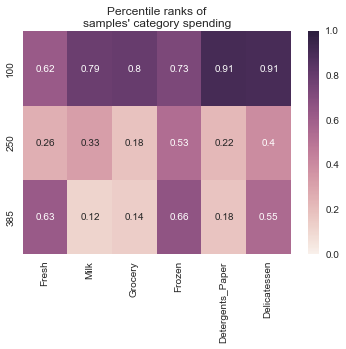

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
# look at percentile ranks
pcts = data.rank(axis = 0, pct = True).iloc[indices].round(decimals = 3)
display(pcts)

# visualize percentiles with heatmap
plt.title('Percentile ranks of\nsamples\' category spending')
display(sns.heatmap(pcts, vmin = 0, vmax = 1, annot = True))

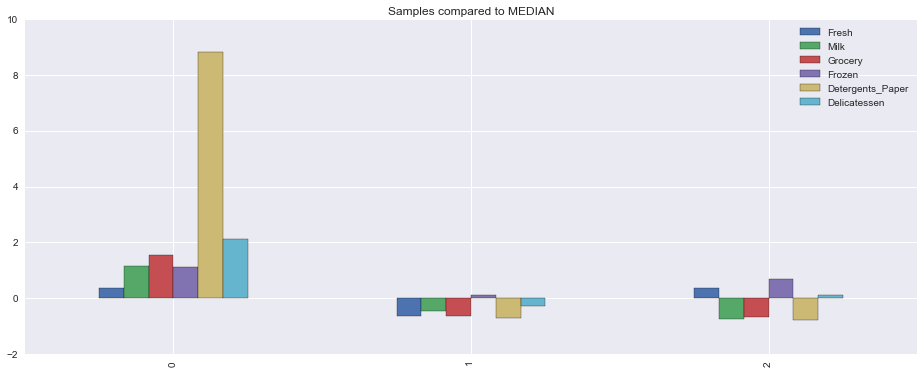

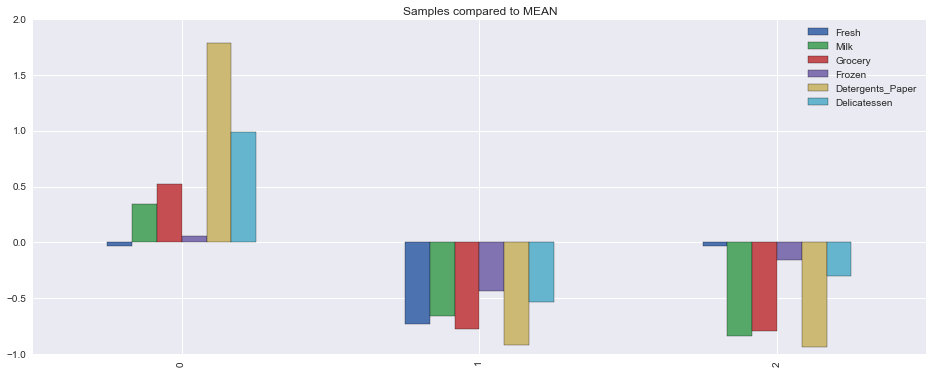

In [129]:
# Plot of samples compared to median or to mean
((samples - data.median()) / data.median()).plot.bar(figsize = (16,6), title = 'Samples compared to MEDIAN')
((samples - data.mean()) / data.mean()).plot.bar(figsize = (16,6), title = 'Samples compared to MEAN');

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [130]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# loop in all features
for i in data.columns:
    new_data = data.drop(i, axis = 1)
    target = data[i]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state = 42)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 42)
    regressor = regressor.fit(X_train, y_train)
    
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "The removed features " + i + ", R^2 score is:", round(score,4)

The removed features Fresh, R^2 score is: -0.3857
The removed features Milk, R^2 score is: 0.1563
The removed features Grocery, R^2 score is: 0.6819
The removed features Frozen, R^2 score is: -0.2101
The removed features Detergents_Paper, R^2 score is: 0.2717
The removed features Delicatessen, R^2 score is: -2.2547


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

> Which feature did you attempt to predict? 
- For global observation, I write a loop function for try every features. 

> What was the reported prediction score? 
```
The removed features Fresh, R^2 score is: -0.3857
The removed features Milk, R^2 score is: 0.1563
The removed features Grocery, R^2 score is: 0.6819
The removed features Frozen, R^2 score is: -0.2101
The removed features Detergents_Paper, R^2 score is: 0.2717
The removed features Delicatessen, R^2 score is: -2.2547
```

> Is this feature is necessary for identifying customers' spending habits?
- Based on the results, the $R^2$ 0.6819 of removed `Grocery` is significant. The `Grocery` feature may not necessary for identifying customers' spending habits, as its determination score is very high which means we can get the same information from other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

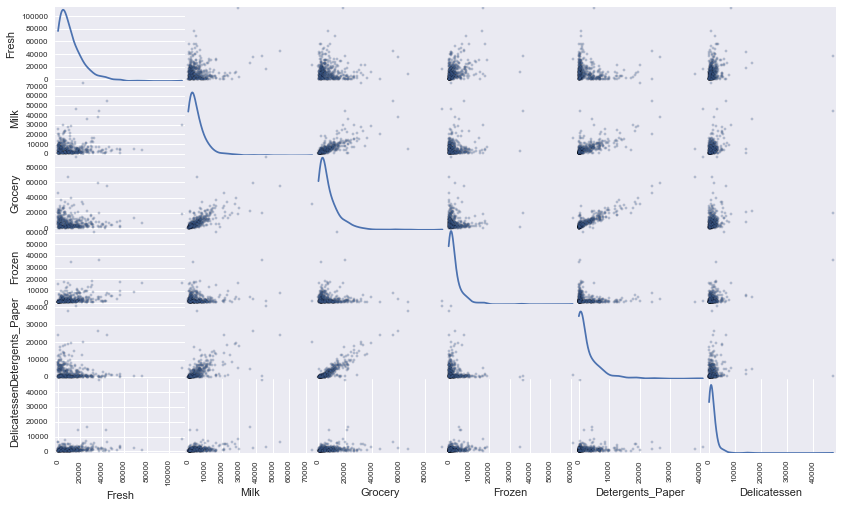

In [131]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

> Are there any pairs of features which exhibit some degree of correlation? 
- The `grocery, milk, detergents_papers` with each other pairs exhibit a slope of correlation.
- The `delicatessen` with other features pairs almost don't exhibit correlation.

> Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
- Yes, the result confirm the suspicions of removed `delicatessen`. 
- But, we should continue to consider the outlier and other reasons may lead to bias. 

> How is the data for those features distributed?
- Those features show the exponential distribution.


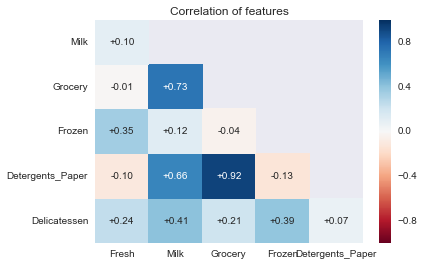

In [132]:
# Plot the correlation of features
plt.title('Correlation of features')

# get the feature correlations
corr = data.corr()

# remove first row and last column for a cleaner look
corr.drop(['Fresh'], axis = 0, inplace = True)
corr.drop(['Delicatessen'], axis = 1, inplace = True)

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, annot = True, cmap = 'RdBu', fmt = '+.2f', cbar = True)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

In [133]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

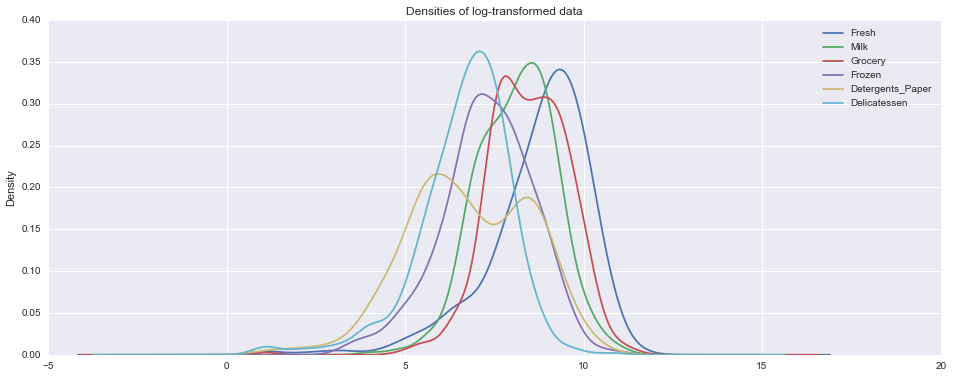

In [134]:
# plot densities of log-transformed data
plt.figure(figsize = (16, 6))
for i in data.columns: log_data[i].plot.kde()
plt.legend()
plt.title('Densities of log-transformed data');

In [135]:
from scipy.stats import boxcox
# transform the data
bc_df = data.copy()
for col in bc_df.columns: bc_df[col], _ = boxcox(bc_df[col])

# plot densities of box-cox data
plt.figure(figsize = (16, 6))
with sns.color_palette("Reds_r"):
    for col in data.columns: sns.kdeplot(bc_df[col], shade = True)
plt.title('Densities of box-cox data');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [136]:
# Display the log-transformed sample data
print "The original samples:"
display(samples)

print "\nThe log-transformed samples:"
display(log_samples)

The original samples:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594  7779    12144    3252              8035          3029
1   3191  1993     1799    1730               234           710
2  11635   922     1614    2583               192          1068


The log-transformed samples:


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.358243  8.959183  9.404590  8.087025          8.991562      8.015988
1  8.068090  7.597396  7.494986  7.455877          5.455321      6.565265
2  9.361773  6.826545  7.386471  7.856707          5.257495      6.973543

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [137]:
# defined all_outliers 
all_outliers = np.array([], dtype='int64')
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "\nData points considered outliers for the feature '{}':".format(feature)
    outlier_feature = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_feature)
    all_outliers = np.append(all_outliers, outlier_feature.index.values.astype('int64'))
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = np.unique(all_outliers)
print "\nThe outliers of all features:\n", outliers
print "\nThe count of outliers: ", np.count_nonzero(outliers)

# Obtain outliers using the counts
all_outlier, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
multiple_feature_outliers = all_outlier[counts > 1]
print "\nOutliers for more than one feature:", multiple_feature_outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[multiple_feature_outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134


Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275


Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442


Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244


Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101


Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918


The outliers of all features:
[ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439]

The count of outliers:  42

Outliers for more than one feature: [ 65  66  75 128 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

> Are there any data points considered outliers for more than one feature based on the definition above? 
- Yes, the outliers for more than one features are `[ 65  66  75 128 154]`

> Should these data points be removed from the dataset? 
- Yes, I finally choose to remove 5 outliers which more than one features, as the `good_data`. 
  Because to remove 42 data is too much based on the 440 sample datasets, which may lead to miss too much information.
- The K-means can be quite sensitive to outliers in dataset. The reason is simply that k-means tries to optimize the **sum of squares**. Thus, a large deviation (such as of an outlier) gets a lot of weight.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [138]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [139]:
display(pca_results)
print "Sum Explained Variance of PCA:" 
print pca_results['Explained Variance'].cumsum()

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430 -0.1675  0.4014   0.4381 -0.1782   
Dimension 2              0.2638  0.6859  0.1672   0.0707  0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485  0.0026 -0.7192  -0.3554  0.0331   
Dimension 6              0.0204 -0.0292  0.5402  -0.8205 -0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7514        0.1499  
Dimension 2            0.0424        0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5            0.5582        0.2092  
Dimension 6            0.1824       -0.0197

Sum Explained Variance of PCA:
Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

> How much variance in the data is explained **in total** by the first and second principal component? 
- The **1st and 2nd** principle components explain **70.68%**.

> What about the first four principal components? 
- The **first four** principle components explain **93.11%**.
- In every dimensions, the specific features may exhibit different capabilities of explained the information. The plot of explained variance in specific dimension show the relationship with specific features. 


> Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.
- The 1st component shows that we have a lot of variance in customers who purchase `Milk`, `Grocery` and `Detergents_Paper`, some purchase a lot of these 3 categories while others purchase very little.
- The 2nd component shows that a lot of variance in customers who purchase `Fresh`, `Frozen` and `Delicatessen` a lot.
- A principal component with feature weights that have opposite directions can reveal how customers buy more in one category while they buy less in the other category. So, the 3rd component can show us customers that buy a lot of `Delicatessen` but little `Fresh`, as well as those who buy in the opposite pattern.

> Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.

> Consider a dataset in only two dimensions, like (height, weight). This dataset can be plotted as points in a plane. But if we want to tease out variation, PCA finds a new coordinate system in which every point has a new (x,y) value. The axes don't actually mean anything physical; they're combinations of height and weight called "principal components" that are chosen to give one axes lots of variation.

> Reference: http://setosa.io/ev/principal-component-analysis/

![PCA](pca.jpg)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [140]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       2.3579       1.7393       0.2210       0.2840       0.5939   
1      -1.5715      -0.6914       0.7154      -0.0264      -0.0495   
2      -2.3040       0.4534       0.2350      -0.2546       0.5351   

   Dimension 6  
0       0.0148  
1       0.2803  
2      -0.1371

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [141]:
# Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

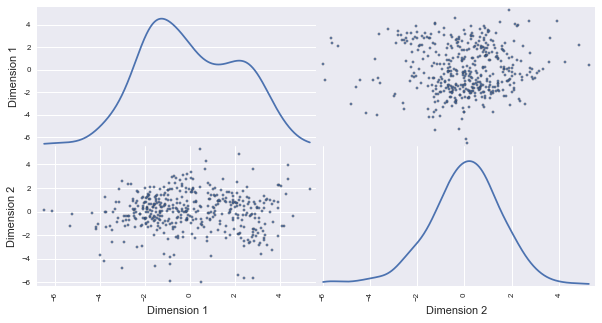

In [142]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (10, 5), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [143]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       2.3579       1.7393
1      -1.5715      -0.6914
2      -2.3040       0.4534

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

> What are the advantages to using a K-Means clustering algorithm? 
- K-means is simple and fast, effective for massive datasets.
- The omplexity is $O(n K_t)$ which is close to linear.
- **Disadvantage:** hard to confirm the $k$ and the center.

> What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
- GMM is a probablilistic model that consider the log-likelihood function and expectation maximization, then consider the score. 
- GMM obtains and incorporates more information than K-means about the covariance structure of the data.

> Compared by speed/Scalability:
- K-Means faster and more scalable
- GMM slower due to using information about the data distribution — e.g., probabilities of points belonging to clusters.

> Compared by cluster assignment:
- K-Means is hard assignment (certain) of points to cluster (assumes symmetrical spherical shapes)
- GMM is soft assignment (uncertain) gives more information such as probabilities (assumes elliptical shape)

> Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?
- I choose the K-means because it seems to be a good start if you don't know much about the structure of the dataset.

> Reference: https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [144]:
from sklearn.cluster import KMeans
## from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

scores = dict()
for i in range(2,10): # (2,6)
    clusterer = KMeans(n_clusters = i, random_state = 42).fit(reduced_data)  ## GMM(n_components = i, ...)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[i] = score

print "The Silhouette Score with k:"
display(scores)

The Silhouette Score with k:


{2: 0.4262810154691084,
 3: 0.39689092644980506,
 4: 0.33184127600936947,
 5: 0.34999779752629756,
 6: 0.36588522063299811,
 7: 0.36480120797880017,
 8: 0.36764075649149885,
 9: 0.35987901460536154}

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

> Report the silhouette score for several cluster numbers you tried. 
- Silhouette Scoure with k = {2: 0.4471,
  3: 0.3639,
  4: 0.3311,
  5: 0.3531,
  6: 0.3637,
  7: 0.3553,
  8: 0.3689,
  9: 0.3674}

> Of these, which number of clusters has the best silhouette score?
- Chose the clusters k = 2

In [146]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters = 2, random_state = 42).fit(reduced_data)
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# Find the cluster centers
centers = clusterer.cluster_centers_
# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print score.round(4);

0.4263


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [147]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [148]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers);

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8867.0  1897.0   2477.0  2088.0             294.0         681.0
Segment 1  4005.0  7900.0  12104.0   952.0            4561.0        1036.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

> What set of establishments could each of the customer segments represent?
- **Segment 0: ** represents on the fresh is over 50% and the frozen, grocery and milk are around 25%, which would be sold in a market or some places that use fresh produce to prepare meals. 
> 
- **Segment 1: ** represents on the milk, grocery, fresh and detergents_paper are over 50%, which would be sold in a public school, university, supermarket or retailer.


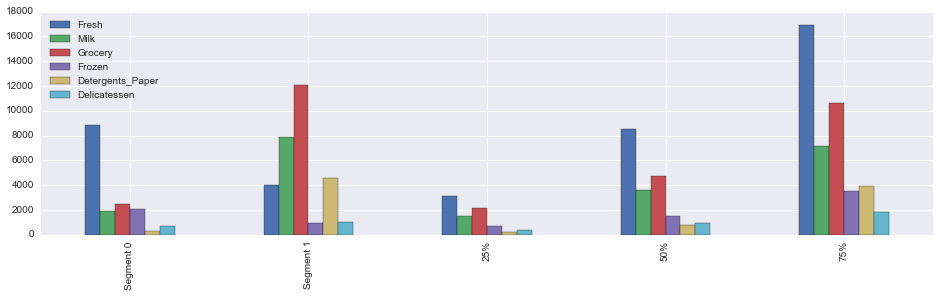

In [149]:
# centers of K-means 
true_centers = true_centers.append(data.describe().ix['25%'])
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers = true_centers.append(data.describe().ix['75%'])
true_centers.plot(kind = 'bar', figsize = (16, 4));

In [151]:
display(data.describe().ix['25%'], data.describe().ix['50%'], data.describe().ix['75%']) 

Fresh               3127.75
Milk                1533.00
Grocery             2153.00
Frozen               742.25
Detergents_Paper     256.75
Delicatessen         408.25
Name: 25%, dtype: float64

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
Name: 50%, dtype: float64

Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicatessen         1820.25
Name: 75%, dtype: float64

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [152]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
sample_preds

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


array([1, 0, 0], dtype=int32)

**Answer:**

> Are the predictions for each sample point consistent with this? 

> For each sample point, which customer segment from Question 8 best represents it? 
- Sample point 0 predicted to be in Cluster 1 is consistent with the prediction.
  - represents customer segments who purchase `Milk` and `Grocery`. 
- Sample point 1 and 2 predicted to be in Cluster 0 is consistent with the prediction.
  - represents customer segments who purchase `Frozen` items.


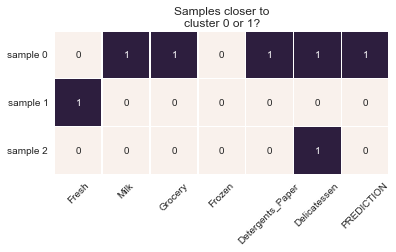

In [153]:
# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).\
applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name = 'PREDICTION')], axis = 1)
sns.heatmap(df_preds, annot = True, cbar = False, yticklabels = ['sample 0', 'sample 1', 'sample 2'], \
            linewidth = .1, square = True)
plt.title('Samples closer to\ncluster 0 or 1?')
plt.xticks(rotation = 45, ha = 'center')
plt.yticks(rotation = 0);

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

> How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?
- If the wholesales distributor implement the proposed A/B test, they should effect with every segments information. For instance, considering the segment 0 with the changes of delivery service from currently 5 days to 3 days a week, the customers spending on `Fresh` category will be affected most. Considering the segment 1 with the changes, the customers spending on `Grocery`, `Milk` and `Fresh` will be affected, but the degree of `Fresh` is less than the segment 0. 
- Once we run the A/B test and the results are positive, then we can consider to scale up the customer segments, and then monitor the impacts of the change. In addition, because the effect of catergories on the specific segment is not equal. We can base on the p-value of A/B test, which mean the significant effect, to compare with the segment 0 (more on `Fresh`) and with the segment 1 (more on `Grocery`, `Mikl` and `Fresh`, but less effect than segment 1 on `Fresh`).

> Reference: Pitfalls of A/B testing https://www.oreilly.com/ideas/evaluating-machine-learning-models/page/6/the-pitfalls-of-a-b-testing

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

> How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?
- In the supervised learning analysis, the classifications can be use in the same structure of dataset by training model for each segments. If the a new feature is added in, the model will predict the segment category for each data point as a variable, which may refine or enhance the predictive power of the supervised learning model.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

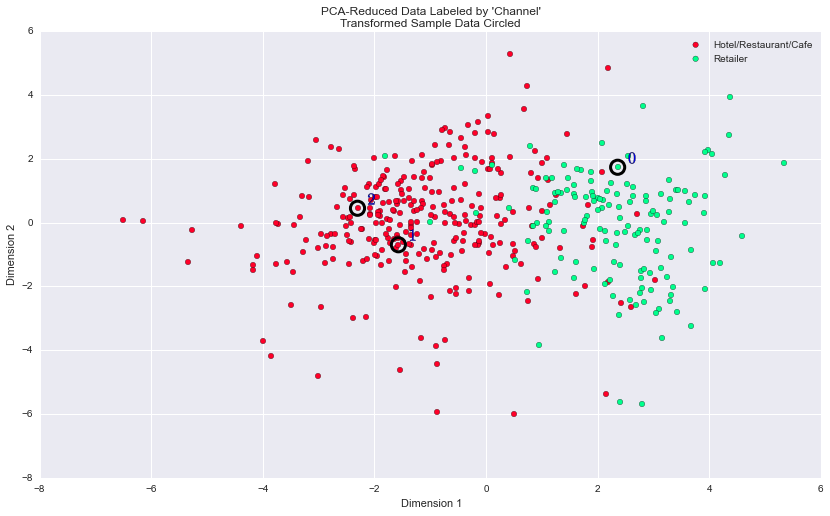

In [154]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, multiple_feature_outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

> How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
- The clustering algorithm does a very good job compared to the underlying distribution (the red points) of Hotel/Restaurant/Cafe customers to Retail customers. Those are kind of establishements of represented by each segment and consistent with the underlying distribution as well. 
  

> Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
- There are some customers who are misclassified by the clustering, especially in the region between the two clusters. To choose a soft clustering would probably have done better and more effective.

> Would you consider these classifications as consistent with your previous definition of the customer segments?
- Yes, the clustering algorithm and number of clusters I've chosen seem to compare well with the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. In addition, I also curious about what result will the GMM shows. Theoretically, the GMM may show more of an overlap between the two clusters.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.